# Color

I don't have nearly enough prepared for this, which I of course apologize for, and of course that doesn't do anything to fix the fact that I haven't prepared enough.

## Models, spaces, gamuts

There are several common mathematicla models that describe various color spaces. We've already briefly talked about RGB space, which is how we describe the color system that governs your monitor. We cal this 'additive color', and its primary components are red, green, and blue. 

Another color sytem that's very common is CMYK. This typically governs the printed page and is called 'subtractive color'---since a white light (made up of all colors) hits the page, and the pigments on the page soak up or subtract wavelengths from the full spectrum and reflect what's left. It's primary commponents are cyan, magenta, yellow, and black (technically 'key' but we don't need to get into that).

Not all printed pages use CMYK---in fact many use a combination of RGB and CMYK and other colors as well.

Other models that are incredibly important are Lab, HSV, and XYZ.

L*a*b*. It's primary axes are Luminosity, *a* represents a continuum between red and green, and *b* represents blue to yellow. 

HSV is hue, saturation, and value. It maps directly onto RGB, but is a more intuitive set of dimensions to work with since they represent concepts that we tend to associate with colors.

XYZ is just a conversion space. Very useful for converting RGB to Lab, etc. It's called the 'tristimulus' space. If I'm honest I don't remember waht its axes are.

## Incompatibility

Each of these spaces contains a different set of colors. Eg you can produce colors in RGB that you cannot print using CMYK, specifically vibrant reds and greens that are common to RGB are impossible to render using standard CMYK. This of course causes trouble when moving from visualizations you've created on screen using python or R to visualiztions printed in a journal.

Luckily, only good journals are usually printed in CMYK, and a good journal will often help prepare your graphics. So things come out in the wash quite often, but it's still good to develop on understanding or awareness of the problem.

Lab can describe colors that are actually out of our perception. Its space is much larger than RGB since it can even represent colors that are non-physical. So only some Lab colors can be represented by an RGB system. And of course less still in CMYK.

## Device dependence and perceptual uniformity

Another issue is that color palettes aren't often 'perceptually uniform'. So you can map a uniform or linear sytem to a colormap that appears suitable---yet in fact the colors don't match the data. Most of the common palettes in use in scienctific work have this deficiency. RGB is not uniform. CMYK is not uniform.

Most color models are specific to the device they're working on. So CMYK works differently on different printing presses and different sheets of paper. RGB works differently on one camera than another. Etc etc. Lab is both device independent and perceptually uniform.

In [70]:
import numpy as np
from colormath.color_objects import LabColor, sRGBColor
from colormath.color_diff import delta_e_cie1976
from colormath.color_conversions import convert_color
import matplotlib.pyplot as plt

rgbs = []
labs = []
cmap = 'viridis'
print(np.arange(10)/10)
for i, x in enumerate(np.arange(10)/10):
    hue = plt.get_cmap(cmap)(x)
    rgb = sRGBColor(rgb_r=hue[0], rgb_g=hue[1], rgb_b=hue[2])
    labs.append(convert_color(rgb, LabColor))
    if i > 0:
        delta_e = delta_e_cie1976(labs[i-1], labs[i])
        print('{} > {}: {}'.format(i-1, i, delta_e))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
0 > 1: 12.927227516522585
1 > 2: 18.064394705735218
2 > 3: 21.51463227564935
3 > 4: 21.24559872579402
4 > 5: 20.53466189582263
5 > 6: 21.156038531209546
6 > 7: 23.855094063818665
7 > 8: 25.36899820551367
8 > 9: 29.182922388149


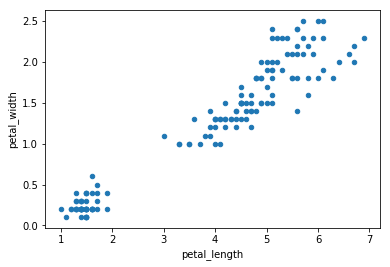

In [87]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./example_graph/iris.csv')
x, y = 'petal_length', 'petal_width'
df.plot.scatter(x, y)

plt.show()

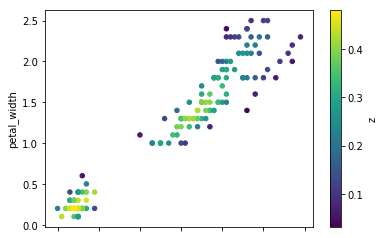

In [88]:
from scipy.stats import gaussian_kde

xy = np.array(df.loc[:, [x, y]]).T
df['z'] = gaussian_kde(xy)(xy)
df.plot.scatter(x, y, c='z', cmap='viridis')

In [89]:
# idx = z.argsort()
# x, y, z = x[idx], y[idx], z[idx]

# foo


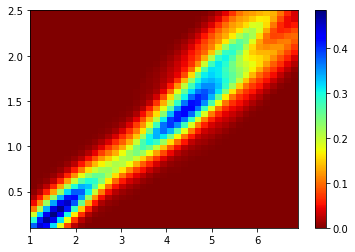

In [15]:
x = xy[0]
y = xy[1]
k = gaussian_kde(xy)
n = 40
xi, yi = np.mgrid[x.min():x.max():n*1j, y.min():y.max():n*1j]
xiyi = np.vstack([xi.flatten(), yi.flatten()])
zi = gaussian_kde(xy)(xiyi)
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap='jet_r')
plt.colorbar()




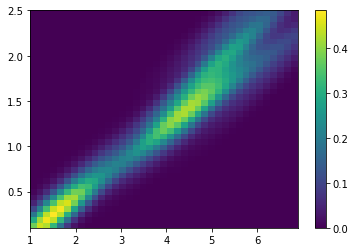

In [16]:
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap='viridis')
plt.colorbar()

In [17]:
import mnist

In [97]:
images = mnist.train_images()
labels = mnist.train_labels()
labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [98]:
labels == 5

array([ True, False, False, ...,  True, False, False])

In [99]:
fives = images[labels==5]
fives.shape

(5421, 28, 28)

In [100]:
z = fives.mean(axis=0)

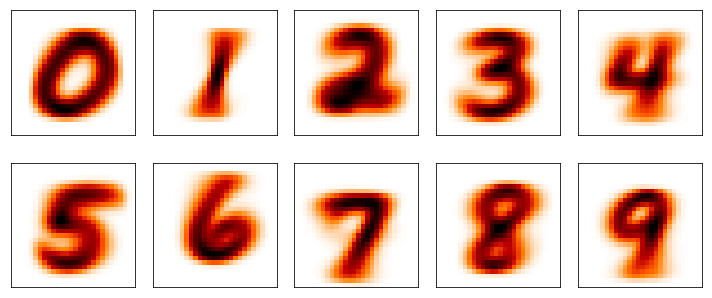

In [101]:
fig = plt.figure(figsize=(10,5))

for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    ax.imshow(images[labels==i].mean(axis=0), cmap='gist_heat_r')
    plt.tight_layout()

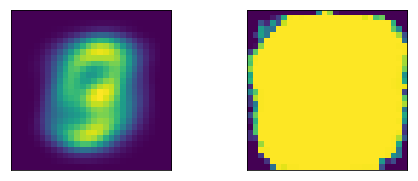

In [102]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(2,3,1)
plt.xticks([])
plt.yticks([])
ax.imshow(images.mean(axis=0), cmap='viridis')
ax = fig.add_subplot(2,3,2)
plt.xticks([])
plt.yticks([])
ax.imshow(images.max(axis=0), cmap='viridis')
plt.tight_layout()

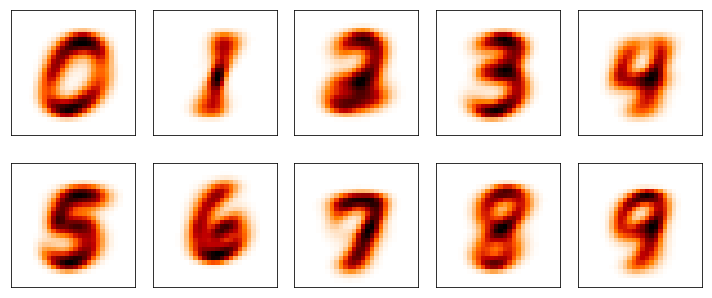

In [103]:
fig = plt.figure(figsize=(10,5))
gm = images.mean(axis=0)

for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    ax.imshow((gm/255) * (images[labels==i].mean(axis=0)/255), cmap='gist_heat_r')
    plt.tight_layout()

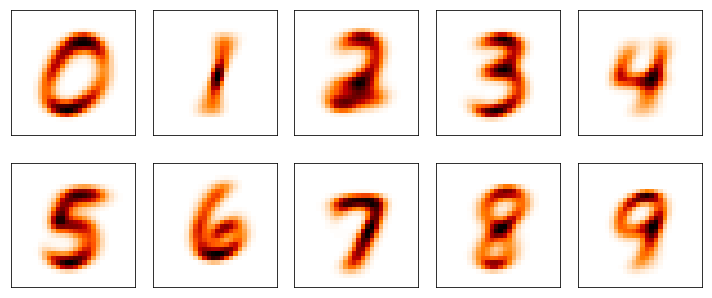

In [104]:
fig = plt.figure(figsize=(10,5))
gm = images.mean(axis=0)

for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    ax.imshow((gm/255) * (images[labels==i].mean(axis=0)/255) * images[labels==i].mean(axis=0), cmap='gist_heat_r')
    plt.tight_layout()

In [108]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()


/Users/nathanmatteson/.virtualenvs/datavis_bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/Users/nathanmatteson/.virtualenvs/datavis_bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


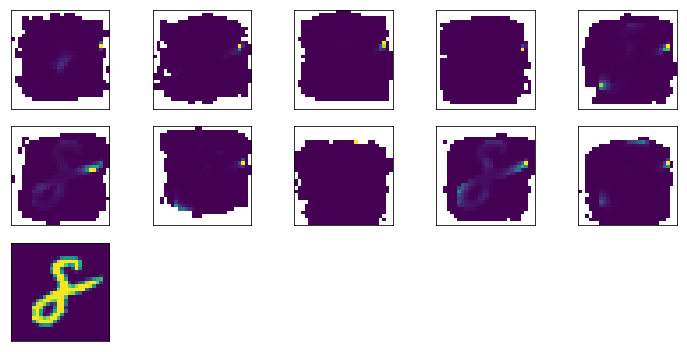

In [132]:
img = test_images[np.random.randint(0, len(test_images))]

fig = plt.figure(figsize=(10,5))

for i in range(10):
    ax = fig.add_subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    imgm = img/images[labels==i].mean(axis=0)
    ax.imshow(imgm, cmap='viridis')
    ax.title()

ax = fig.add_subplot(3, 5, 11)
plt.xticks([])
plt.yticks([])
ax.imshow(img, cmap='viridis')

plt.tight_layout()